# A2 - Analisando Repositórios Filtrados
Este notebook analisa dados de repositórios que foram coletados e sobreviveram à filtragem.
Responde às questões de pesquisa: QP1, QP2, QP4, QP7

In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from src.config.consts import DB_DIR
from src.config.states import REP_COLLECTED, REP_DISCARDED
from src.helpers.h7_analysis_helpers import pastel_colormap

In [2]:
conn = sqlite3.connect(DB_DIR + '/final.sqlite')
cmap = pastel_colormap()

In [3]:
repositories = pd.read_sql_query("SELECT * FROM repositories", conn)
filtered = repositories[(repositories["state"] !=  REP_COLLECTED) & (repositories["state"] != REP_DISCARDED)]
print('Total de Repositórios Filtrados: ',len(filtered))

Total de Repositórios Filtrados:  166867


# QP1. Quais são as linguagens de programação mais populares?

#### Linguagens mais Populares

In [4]:
primary_languages = filtered.primary_language\
    .value_counts(dropna=False)\
    .rename_axis('primary_language').to_frame("Repositories")
display(primary_languages)

,Repositories
primary_language,
Jupyter Notebook,116005
Python,23036
HTML,11502
R,9062
JavaScript,1349
...,...
Gnuplot,1
IDL,1
ReScript,1


In [5]:
pl = primary_languages[:4].reset_index(level=0)
others = pd.DataFrame(data = {
    'primary_language' : ['Outras'],
    'Repositories' : [primary_languages['Repositories'][4:].sum()]
})

pl2 = pd.concat([pl,others]).reset_index(drop=True)\
    .sort_values(by='Repositories', ascending=False)
display(pl2)

,primary_language,Repositories
0,Jupyter Notebook,116005
1,Python,23036
2,HTML,11502
3,R,9062
4,Outras,7262


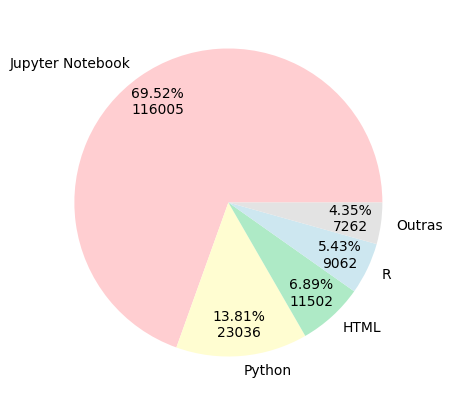

In [6]:
fig1, ax1 = plt.subplots(figsize=(5,5))
pl2.plot.pie(ax=ax1, y="Repositories",
             labels=pl2["primary_language"], ylabel='',cmap=pastel_colormap(), pctdistance=0.8,
             autopct=(lambda prct_value: '{:.2f}%\n{:.0f}'
                 .format(prct_value, (len(filtered) * prct_value / 100))) ).get_legend().remove()


fig1.savefig("outputs/a2/linguagens1.png", dpi=500, format='png')

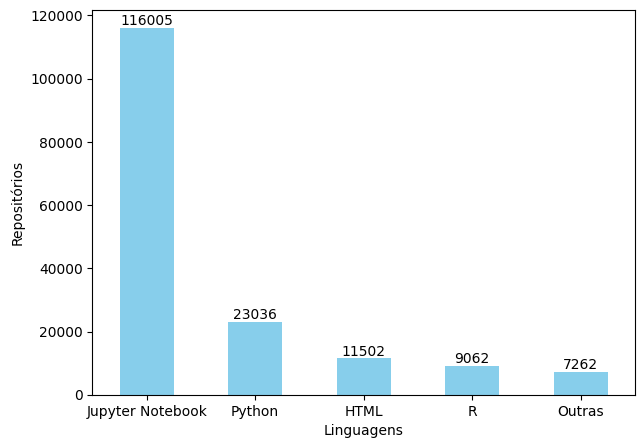

In [7]:
fig2, ax2 = plt.subplots(figsize=(7,5))
pl2.plot.bar(ax=ax2, color="skyblue",
             xlabel='Linguagens', ylabel= "Repositórios"
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3,4],
           labels=pl2["primary_language"], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge');

#### Número de Linguagens

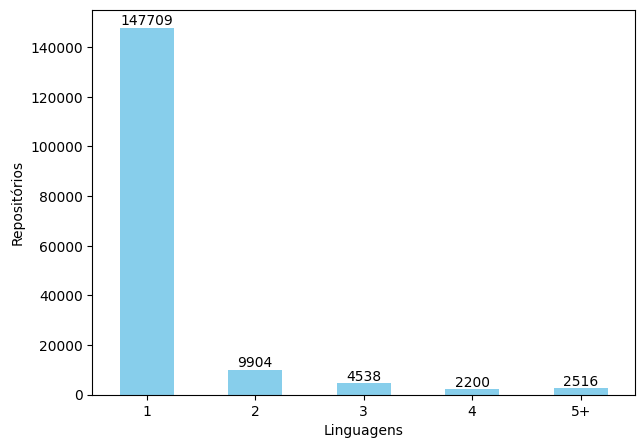

In [8]:
languages = filtered.languages\
    .value_counts(dropna=False, bins = [1,2, 3, 4, 5, 100])\
    .sort_index().to_frame("Repositories")

fig3, ax3 = plt.subplots( figsize=(7,5))
languages.plot.bar(color='skyblue', ax=ax3,
                   xlabel='Linguagens', ylabel='Repositórios').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2','3', '4', '5+'], rotation=0)
ax3.bar_label(ax3.containers[0], label_type='edge')
fig3.savefig("outputs/a2/num_linguagens.png", dpi=500, format='png');

In [9]:
filtered.languages.mean()

1.5562513858342273

# QP2. Quantas pessoas normalmente estão envolvidas diretamente nos projetos?

### Colaboradores

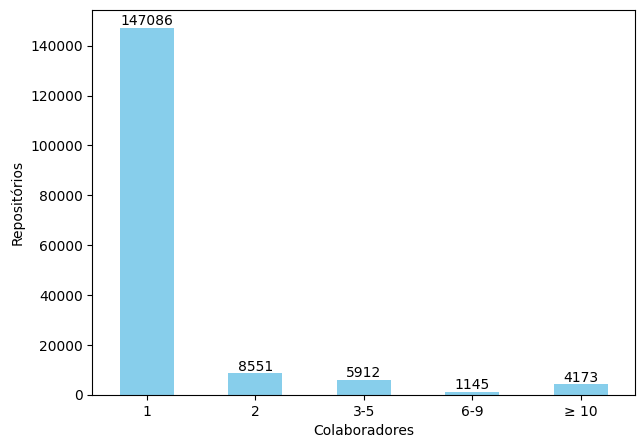

In [10]:
fig4, ax4 = plt.subplots( figsize=(7,5))
contributors = filtered.contributors\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
contributors.plot.bar(color='skyblue', ax=ax4,
                   xlabel='Colaboradores', ylabel='Repositórios').get_legend().remove()

ax4.set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax4.bar_label(ax4.containers[0], label_type='edge')
fig4.savefig("outputs/a2/colaboradores.png", dpi=500, format='png');

In [11]:
print('A média de colaboradores é:', filtered.contributors.mean())
print('A média dos em colaboração:',filtered[filtered['contributors']>1].contributors.mean())
print('Maior número de colaboradores:', filtered.contributors.max())

A média de colaboradores é: 5.17057896408517
A média dos em colaboração: 36.18184116070977
Maior número de colaboradores: 10000


### Commits

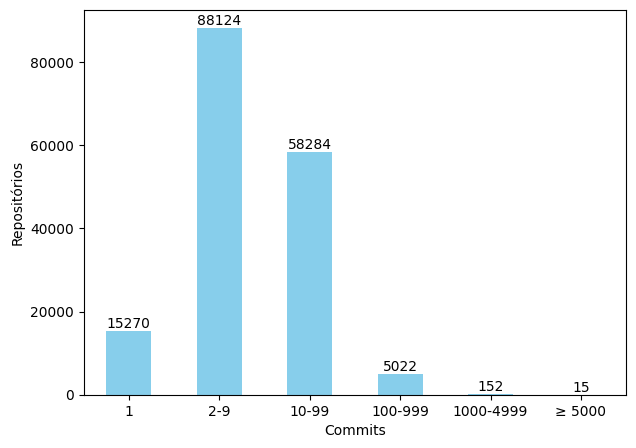

In [12]:
fig5, ax5 = plt.subplots( figsize=(7, 5))

commits = filtered.commits\
    .value_counts(dropna=False, bins = [0, 1,9,99,999, 4999, 100000])\
    .sort_index().to_frame("Repositories")
commits.plot.bar(color='skyblue', ax=ax5,
                   xlabel='Commits', ylabel='Repositórios').get_legend().remove()

ax5.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1', '2-9', '10-99','100-999', '1000-4999', '≥ 5000'], rotation=0)
ax5.bar_label(ax5.containers[0], label_type='edge')

fig5.savefig("outputs/a2/commits.png", dpi=500, format='png');

In [13]:
filtered.commits.mean()

21.286941096801645

### Branches

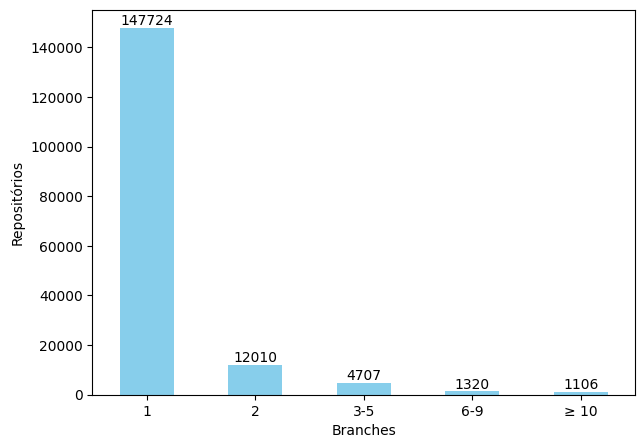

In [14]:
fig6, ax6 = plt.subplots( figsize=(7, 5))
branches = filtered.branches\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
branches.plot.bar(color='skyblue', ax=ax6,
                   xlabel='Branches', ylabel='Repositórios').get_legend().remove()

ax6.set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax6.bar_label(ax6.containers[0], label_type='edge')
fig6.savefig("outputs/a2/branches.png", dpi=500, format='png');

In [15]:
filtered.branches.mean()

1.3308742891044965

### Data de Criação

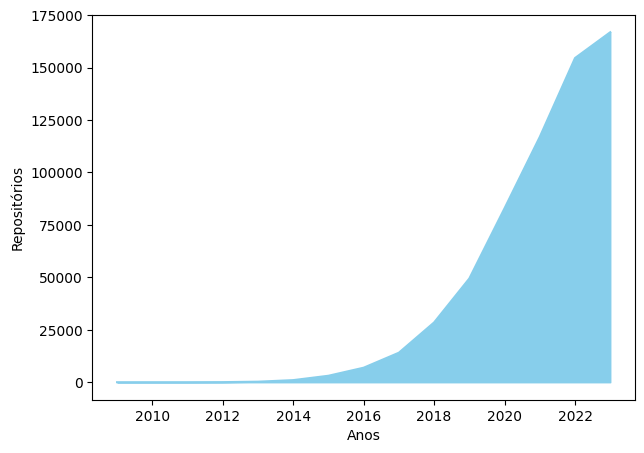

In [16]:
fig7, ax7 = plt.subplots( figsize=(7, 5))

creation = pd.to_datetime(filtered['git_created_at']).dt.year.value_counts(dropna=False)\
    .sort_index().to_frame("Repositories")
creation_cumulative = creation['Repositories'].cumsum()

creation_cumulative.plot(ax=ax7, y='Repositories', color='skyblue')
ax7.fill_between(creation_cumulative.index, 0, creation_cumulative, color='skyblue')
ax7.set_xlabel('Anos')
ax7.set_ylabel('Repositórios')
fig7.savefig("outputs/a2/criacao.png", dpi=500, format='png')
creation = creation.rename_axis('Anos').reset_index(drop=False)

In [35]:
display(creation[creation["Anos"]<2017].Repositories.sum())
display(creation[creation["Anos"]<2017].Repositories.sum()*100/166867)

6922

4.148213846955959

In [34]:
display(creation[creation["Anos"]>=2017].Repositories.sum())
display(creation[creation["Anos"]>=2017].Repositories.sum()*100/166867)

159945

95.85178615304405

In [37]:
crescimento = (creation[creation["Anos"]>=2017].Repositories.sum() - creation[creation["Anos"]<2017].Repositories.sum())/\
              creation[creation["Anos"]<2017].Repositories.sum()
display(crescimento*100)

2210.676105171916

### Tempo de Vida

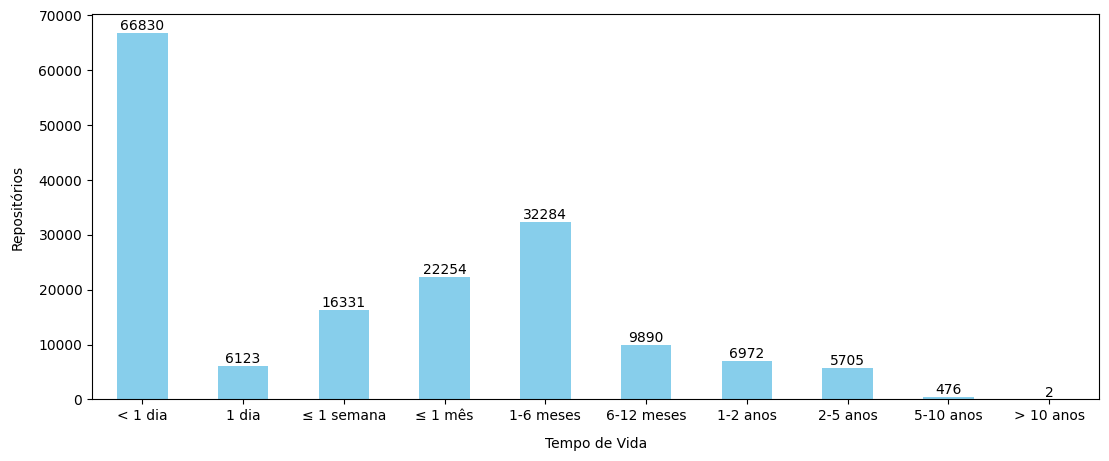

In [18]:
fig8, ax8 = plt.subplots( figsize=(13, 5))
dates = filtered[['repository', 'git_created_at', 'git_pushed_at']].copy()
dates["git_pushed_at"] = pd.to_datetime(dates["git_pushed_at"])
dates["git_created_at"] = pd.to_datetime(dates["git_created_at"])
dates =  dates.dropna(subset=['git_created_at'])
dates =  dates.dropna(subset=['git_pushed_at'])


dates["interval"] =  dates.git_pushed_at - dates.git_created_at
dates["interval_days"] = dates["interval"].dt.days.astype(int).abs()

duration = dates['interval_days'].value_counts(dropna=False, bins = [-1, 0,1,7,30,180, 365, 730, 1825, 3650, 100000])\
    .sort_index().to_frame("Repositories")
duration.plot.bar(ax=ax8, y="Repositories", color="skyblue").get_legend().remove()

ax8.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                labels=['< 1 dia', '1 dia','≤ 1 semana', '≤ 1 mês', '1-6 meses',
                        '6-12 meses','1-2 anos', '2-5 anos', '5-10 anos', '> 10 anos'], rotation=0)
ax8.bar_label(ax8.containers[0], label_type='edge')
ax8.set_xlabel("Tempo de Vida", labelpad=10)
ax8.set_ylabel("Repositórios", labelpad=10)
fig8.savefig("outputs/a2/tempo_de_vida.png", dpi=500, format='png')

In [19]:
display(dates.interval.mean())

Timedelta('97 days 01:35:32.192075126')

# QP4. Como os projetos utilizam o GitHub?

### Pull Requests

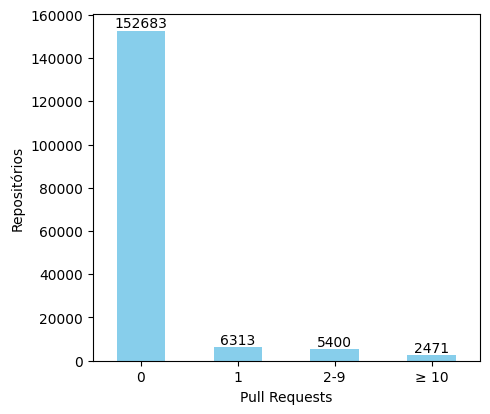

In [20]:
fig9, ax9 = plt.subplots( figsize=(5, 4.5))
pull_requests = filtered.pull_requests\
    .value_counts(dropna=False, bins = [-1, 0,1, 9, 100000])\
    .sort_index().to_frame("Repositories")
pull_requests.plot.bar(color='skyblue', ax=ax9,
                   xlabel='Pull Requests', ylabel='Repositórios').get_legend().remove()

ax9.set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax9.bar_label(ax9.containers[0], label_type='edge')
fig9.savefig("outputs/a2/pull_requests.png", dpi=500, bbox_inches='tight', format='png');

In [21]:
filtered.pull_requests.mean()

0.8354378037598806

### Issues

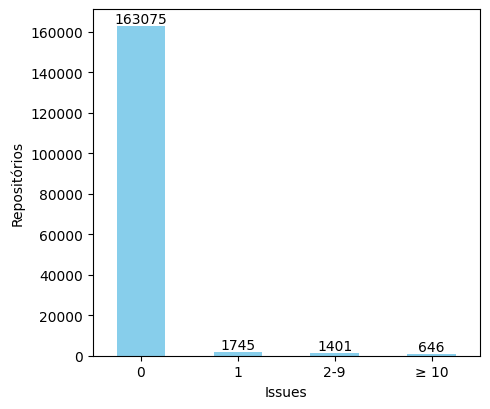

In [22]:
fig10, ax10 = plt.subplots( figsize=(5, 4.5))
issues = filtered.issues\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

issues.plot.bar(color='skyblue', ax=ax10,
                   xlabel='Issues', ylabel='Repositórios').get_legend().remove()

ax10.set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax10.bar_label(ax10.containers[0], label_type='edge')
fig10.savefig("outputs/a2/issues.png", dpi=500, bbox_inches='tight', format='png');

In [23]:
filtered.issues.mean()

0.2936590218557294

### Forks

In [24]:
forks = filtered.forks\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

display(forks)

,Repositories
"(-1.001, 0.0]",149925
"(0.0, 1.0]",9302
"(1.0, 9.0]",5587
"(9.0, 100000.0]",2053


In [25]:
filtered.forks.mean()

2.045521283417332

### Tags

In [26]:
tags = filtered.tags\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")
display(tags)

,Repositories
"(-1.001, 0.0]",165537
"(0.0, 1.0]",623
"(1.0, 9.0]",516
"(9.0, 100000.0]",191


### Releases

In [27]:
releases = filtered.releases\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")
display(releases)

,Repositories
"(-1.001, 0.0]",166001
"(0.0, 1.0]",450
"(1.0, 9.0]",322
"(9.0, 100000.0]",94


### Watchers

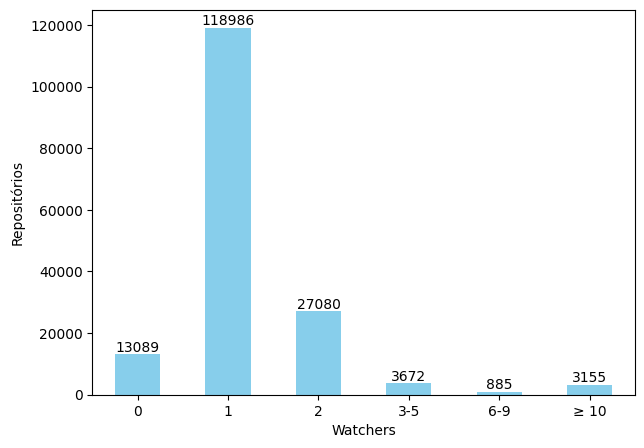

In [28]:
fig12, ax12 = plt.subplots( figsize=(7, 5))

watchers = filtered.watchers\
    .value_counts(dropna=False, bins = [-1, 0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

watchers.plot.bar(color='skyblue', ax=ax12,
                   xlabel='Watchers', ylabel='Repositórios').get_legend().remove()

ax12.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2', '3-5', '6-9', '≥ 10'], rotation=0)
ax12.bar_label(ax12.containers[0], label_type='edge')
fig6.savefig("outputs/a2/watchers.png", dpi=500,  format='png');

### Stars

,id,state,domain,repository,extraction_id,primary_language,disk_usage,is_mirror,git_created_at,git_pushed_at,...,has_next_page,notebooks_count,python_files_count,setups_count,requirements_count,pipfiles_count,pipfile_locks_count,created_at,updated_at,part
22672,22673,repository_finished_processing,github.com,donnemartin/data-science-ipython-notebooks,3.820000e+02,Python,49025,0,2015-01-23 21:38:29.000000,2023-04-01 09:59:21.000000,...,1,111.0,55.0,0.0,0.0,0.0,0.0,2023-03-26 22:55:15.231817,2023-06-11 13:12:45.094222,0.0
54348,54349,repository_finished_processing,github.com,jakevdp/PythonDataScienceHandbook,3.950000e+02,Jupyter Notebook,34684,0,2016-08-10 17:24:36.000000,2023-04-01 09:45:30.000000,...,1,136.0,10.0,0.0,1.0,0.0,0.0,2023-03-26 23:01:47.106660,2023-06-11 14:52:49.375006,0.0
111126,111127,repository_finished_processing,github.com,virgili0/Virgilio,1.000000e+11,Jupyter Notebook,33930,0,2019-03-12 21:45:36.000000,2022-07-25 11:16:15.000000,...,1,11.0,1.0,0.0,0.0,0.0,0.0,2023-03-28 23:23:28.460935,2023-06-11 00:27:48.639691,1.0
208405,208406,repository_finished_processing,github.com,microsoft/Data-Science-For-Beginners,3.000000e+11,Jupyter Notebook,70165,0,2021-03-03 19:30:15.000000,2023-04-01 07:25:21.000000,...,1,24.0,0.0,0.0,0.0,0.0,0.0,2023-03-26 22:45:31.245341,2023-06-10 23:45:03.516879,3.0


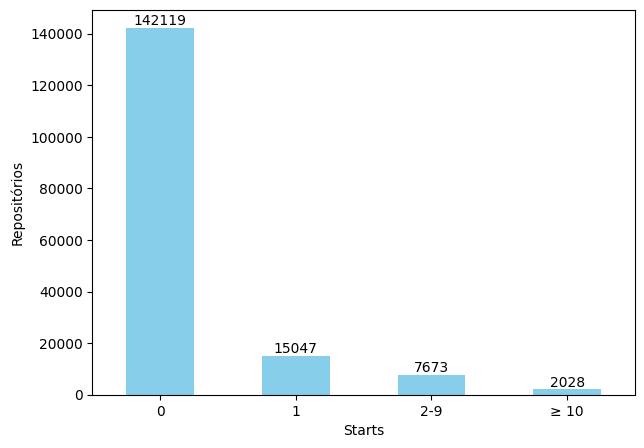

In [29]:
fig13, ax13 = plt.subplots( figsize=(7, 5))
display(filtered[filtered['stargazers']>10000])
stars = filtered.stargazers\
    .value_counts(dropna=False, bins = [-1, 0,1,9, 100000])\
    .sort_index().to_frame("Repositories")

stars.plot.bar(color='skyblue', ax=ax13,
                   xlabel='Starts', ylabel='Repositórios').get_legend().remove()

ax13.set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax13.bar_label(ax13.containers[0], label_type='edge')
fig7.savefig("outputs/a2/stars.png", dpi=500,  format='png');

# QP7. Qual o tamanho dos projetos?

### Tamanho em Disco

In [30]:
display(filtered[filtered.disk_usage.astype(int) > 0])

,id,state,domain,repository,extraction_id,primary_language,disk_usage,is_mirror,git_created_at,git_pushed_at,...,has_next_page,notebooks_count,python_files_count,setups_count,requirements_count,pipfiles_count,pipfile_locks_count,created_at,updated_at,part
0,1,repository_finished_processing,github.com,pmane/Data-Science,4.340000e+02,Jupyter Notebook,1263,0,2009-08-27 13:22:02.000000,2021-02-27 11:14:52.000000,...,1,3.0,0.0,0.0,0.0,0.0,0.0,2023-03-28 17:24:27.063084,2023-06-11 22:10:02.555746,0.0
1,2,repository_filtered,github.com,petewarden/dstk,NaN,Ruby,3817,0,2011-03-07 08:02:00.000000,2016-08-29 15:16:48.000000,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-27 20:43:31.572797,2023-06-05 12:34:21.460273,NaN
3,4,repository_filtered,github.com,rtelmore/RDSTK,NaN,R,608,0,2011-05-01 05:08:32.000000,2017-11-20 22:47:34.000000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-27 21:57:44.393790,2023-06-05 12:34:21.460273,NaN
4,5,repository_filtered,github.com,mbriney/dstk-google-refine,NaN,PHP,84,0,2011-08-29 21:56:17.000000,2011-08-29 22:13:00.000000,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-27 17:03:41.966615,2023-06-05 12:34:21.460273,NaN
6,7,repository_filtered,github.com,mbriney/Legislator-Lookup,NaN,PHP,96,0,2011-10-11 21:52:38.000000,2011-10-11 22:00:15.000000,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-27 17:03:41.968340,2023-06-05 12:34:21.460273,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327001,327002,repository_finished_processing,github.com,idealidler/Enhancing-Public-Safety-in-Philadel...,7.000000e+11,Jupyter Notebook,3425,0,2023-03-29 02:26:15.000000,2023-03-29 03:00:41.000000,...,0,3.0,0.0,0.0,0.0,0.0,0.0,2023-03-29 01:19:46.221925,2023-06-12 09:54:30.412053,7.0
327002,327003,repository_finished_processing,github.com,sheetalsattiraju/DataScienceEcosystem,7.000000e+11,Jupyter Notebook,7,0,2023-03-29 02:31:46.000000,2023-03-29 02:45:58.000000,...,0,1.0,0.0,0.0,0.0,0.0,0.0,2023-03-29 01:19:45.695252,2023-06-14 21:58:56.056861,7.0
327003,327004,repository_finished_processing,github.com,CJ7MO/Data-Science-Projects,6.000000e+11,Jupyter Notebook,9244,0,2023-03-29 02:37:16.000000,2023-03-29 02:43:49.000000,...,0,22.0,0.0,0.0,0.0,0.0,0.0,2023-03-29 01:19:45.599180,2023-06-07 16:18:39.881966,6.0
327006,327007,repository_finished_processing,github.com,BBERNUIA/DataScienceEcosystem,7.000000e+11,Jupyter Notebook,1,0,2023-03-29 03:05:08.000000,2023-03-29 03:06:23.000000,...,0,1.0,0.0,0.0,0.0,0.0,0.0,2023-03-29 01:19:46.507108,2023-06-14 21:58:56.056861,7.0


13528601

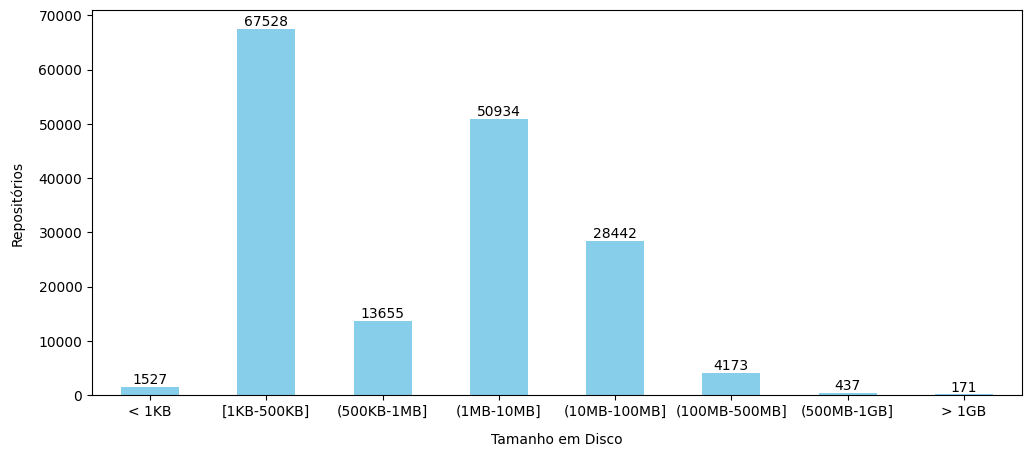

In [31]:
fig14, ax14 = plt.subplots(figsize=(12, 5))

display(filtered.disk_usage.astype(int).max())

disk_usage = filtered.disk_usage.astype(int)\
    .value_counts(dropna=False, bins=[-1, 0, 500, 10**3, 10**4, 10**5, 5*10**5,10**6,10**12])\
    .sort_index().to_frame("Repositories")
disk_usage.plot.bar(ax=ax14, color='skyblue').get_legend().remove()
ax14.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7],
                labels=['< 1KB', '[1KB-500KB]', '(500KB-1MB]', '(1MB-10MB]', '(10MB-100MB]',
                                                      '(100MB-500MB]', '(500MB-1GB]', '> 1GB'], rotation=0)
ax14.bar_label(ax14.containers[0], label_type='edge')
ax14.set_xlabel("Tamanho em Disco", labelpad=10)
ax14.set_ylabel("Repositórios", labelpad=10)
fig14.savefig("outputs/a2/tamanho.png", dpi=500, bbox_inches='tight', format='png');

In [32]:
filtered.disk_usage.astype(int).mean()/10**3

15.241527485961873